In [10]:
!python3 /home/smartan5070/Downloads/SlowfastTrainer-main/train_MViT.py
# !python3 /home/smartan5070/Downloads/SlowfastTrainer-main/train_MViT_aug.py

Device: cuda
_transforms_video is available
/home/smartan5070/Downloads/SlowfastTrainer-main/virenv/lib/python3.10/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/smartan5070/Downloads/SlowfastTrainer-main/virenv/lib/python3.10/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
Fallback _transforms_video not available
/home/smartan5070/Downloads/SlowfastTrainer-main/virenv/lib/python3.10/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database b

In [11]:
!python test_MViT.py --run_id '106e4008a54a4baa92886afbb6457432'

Device: cuda
_transforms_video is available
/home/smartan5070/Downloads/SlowfastTrainer-main/virenv/lib/python3.10/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/smartan5070/Downloads/SlowfastTrainer-main/virenv/lib/python3.10/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
Fallback _transforms_video not available
Using MLflow Run ID: 106e4008a54a4baa92886afbb6457432
/home/smartan5070/Downloads/SlowfastTrainer-main/virenv/lib/python3.10/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., '.

In [12]:
!python mlflow2ptmodel.py --run_id "106e4008a54a4baa92886afbb6457432" --model_name "31_class_model_acc80_17_12"

/home/smartan5070/Downloads/SlowfastTrainer-main/virenv/lib/python3.10/site-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
Saved model state_dict to: /home/smartan5070/Downloads/SlowfastTrainer-main/downloaded_models/31_class_model_acc80_17_12.pt


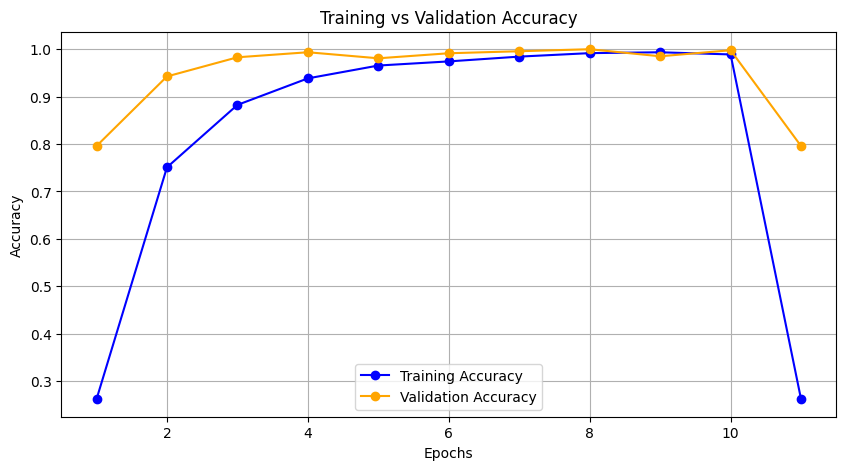

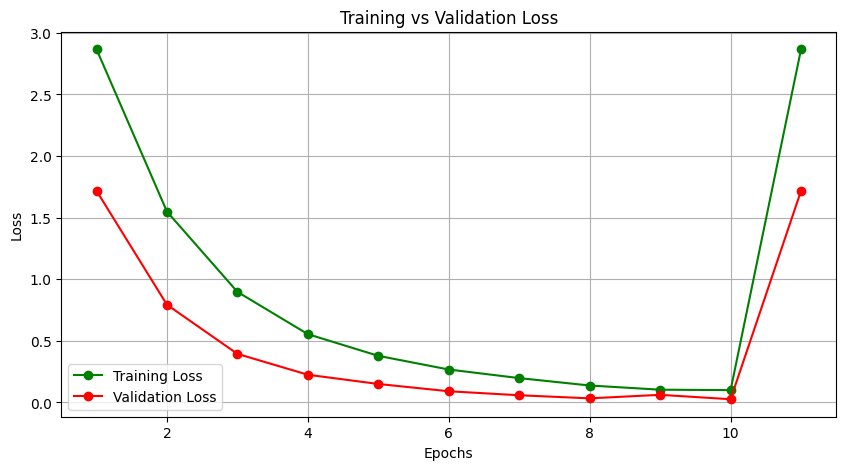

In [ ]:
import mlflow
import matplotlib.pyplot as plt

# Replace with your MLflow run ID
run_id = "106e4008a54a4baa92886afbb6457432"

# Fetch metrics from MLflow
client = mlflow.tracking.MlflowClient()

train_acc = [m.value for m in client.get_metric_history(run_id, "train_accuracy")]
val_acc = [m.value for m in client.get_metric_history(run_id, "val_accuracy")]
train_loss = [m.value for m in client.get_metric_history(run_id, "train_loss")]
val_loss = [m.value for m in client.get_metric_history(run_id, "val_loss")]

# Trim all lists to the minimum length to avoid extra points
min_len = min(len(train_acc)-1, len(val_acc)-1, len(train_loss)-1, len(val_loss)-1)
train_acc, val_acc = train_acc[:min_len], val_acc[:min_len]
train_loss, val_loss = train_loss[:min_len], val_loss[:min_len]
epochs = list(range(1, min_len+1))

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc, label="Training Accuracy", color='blue', marker='o')
plt.plot(epochs, val_acc, label="Validation Accuracy", color='green', marker='o')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

# Save figure
plt.savefig("training_vs_validation_accuracy.png", dpi=300, bbox_inches="tight")
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss, label="Training Loss", color='blue', marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", color='green', marker='o')
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Save figure
plt.savefig("training_vs_validation_loss.png", dpi=300, bbox_inches="tight")
plt.show()
